In [1]:
# ================================================================
# SNAPSHELF AI - MODEL COMPARISON ANALYSIS
# ================================================================
# Project:      SnapShelf - Smart Food Inventory Management
# Module:       MOD002691 - Final Project (BSc Software Engineering)
# Institution:  Anglia Ruskin University, Cambridge
# Author:       Oriol Morros Vilaseca (SID: 2270056)
# Supervisor:   Mr Vitaliy Milke
# Date:         January 2026
# ================================================================
#
# PURPOSE:
# This notebook provides a comprehensive comparison of three image
# classification approaches for food recognition:
#   1. Custom CNN (trained from scratch)
#   2. EfficientNetB0 (transfer learning)
#   3. YOLOv8 (classification mode)
#
# This analysis directly addresses Research Question 1 (RQ1):
# "How do different computer vision approaches compare in terms of
# accuracy, inference time, and computational efficiency for
# household food item recognition?"
#
# INPUT:
#   - custom_cnn_results.json
#   - efficientnet_results.json
#   - yolo_results.json
#
# OUTPUT:
#   - Comparison tables and charts
#   - Publication-ready figures for dissertation
#
# ================================================================

import sys
import platform
from datetime import datetime

print("=" * 65)
print("SNAPSHELF AI - MODEL COMPARISON ANALYSIS")
print("=" * 65)
print(f"Execution Date:  {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Python Version:  {sys.version.split()[0]}")
print("=" * 65)

SNAPSHELF AI - MODEL COMPARISON ANALYSIS
Execution Date:  2026-01-04 12:03:08
Python Version:  3.12.12


In [2]:
# ================================================================
# CELL 2: IMPORT LIBRARIES & MOUNT DRIVE
# ================================================================

import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set style for publication-quality figures
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10

print("Libraries imported successfully.")
print("Plot style configured for publication quality.")

Mounted at /content/drive
Libraries imported successfully.
Plot style configured for publication quality.


In [3]:
# ================================================================
# CELL 3: LOAD MODEL RESULTS
# ================================================================
# Load the JSON results files from each model training notebook.
# ================================================================

print("=" * 65)
print("LOADING MODEL RESULTS")
print("=" * 65)

MODELS_DIR = "/content/drive/MyDrive/snapshelf_models"

# Load results for each model
results_files = {
    "Custom CNN": "custom_cnn_results.json",
    "EfficientNet": "efficientnet_results.json",
    "YOLOv8": "yolo_results.json"
}

model_results = {}

for model_name, filename in results_files.items():
    filepath = os.path.join(MODELS_DIR, filename)
    if os.path.exists(filepath):
        with open(filepath, 'r') as f:
            model_results[model_name] = json.load(f)
        print(f"  Loaded: {model_name}")
    else:
        print(f"  NOT FOUND: {filepath}")

print(f"\nSuccessfully loaded {len(model_results)} model results.")

LOADING MODEL RESULTS
  Loaded: Custom CNN
  Loaded: EfficientNet
  Loaded: YOLOv8

Successfully loaded 3 model results.


In [4]:
# ================================================================
# CELL 4: CREATE SUMMARY COMPARISON TABLE
# ================================================================
# Extracts key metrics from each model for side-by-side comparison.
# ================================================================

print("=" * 65)
print("MODEL COMPARISON SUMMARY")
print("=" * 65)

# Extract metrics into a structured format
comparison_data = []

for model_name, results in model_results.items():
    # Handle different result structures
    if model_name == "YOLOv8":
        test_acc = results["performance"]["test_accuracy_top1"]
    else:
        test_acc = results["performance"]["test_accuracy"]

    row = {
        "Model": model_name,
        "Test Accuracy (%)": round(test_acc * 100, 2),
        "Inference Single (ms)": results["efficiency"]["inference_time_single_ms"],
        "Inference Batch (ms)": results["efficiency"]["inference_time_batch_ms"],
        "Model Size (MB)": results["efficiency"]["model_size_mb"],
        "Training Time (s)": results["training"]["training_time_seconds"]
    }
    comparison_data.append(row)

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Format training time as HH:MM:SS
def format_time(seconds):
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    secs = int(seconds % 60)
    return f"{hours}:{minutes:02d}:{secs:02d}"

comparison_df["Training Time"] = comparison_df["Training Time (s)"].apply(format_time)

# Display table
print("\n")
display_df = comparison_df[["Model", "Test Accuracy (%)", "Inference Single (ms)",
                            "Inference Batch (ms)", "Model Size (MB)", "Training Time"]]
print(display_df.to_string(index=False))

# Store for later use
COMPARISON_DF = comparison_df

MODEL COMPARISON SUMMARY


       Model  Test Accuracy (%)  Inference Single (ms)  Inference Batch (ms)  Model Size (MB) Training Time
  Custom CNN              98.50                  75.49                  2.13            55.18       1:29:15
EfficientNet              99.74                  61.16                  7.83            40.03       3:54:21
      YOLOv8              99.74                   7.20                  4.14             9.81       0:37:45


ACCURACY COMPARISON


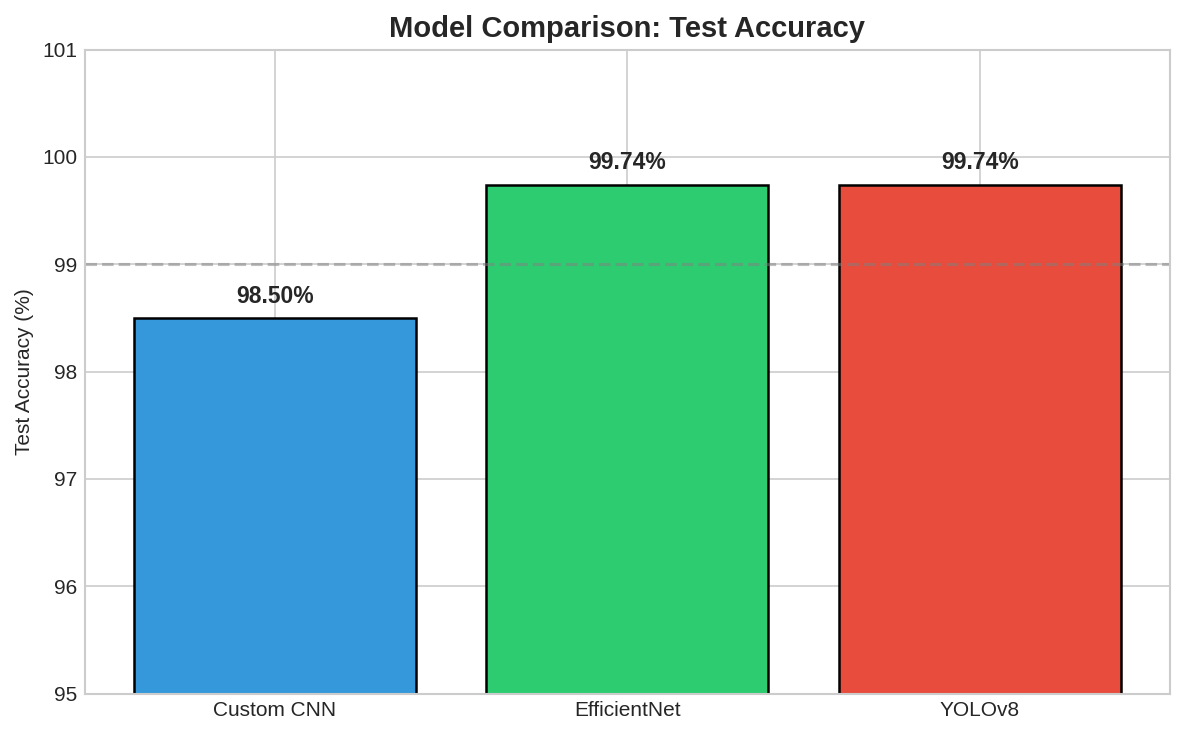


Chart saved to: /content/comparison_accuracy.png


In [5]:
# ================================================================
# CELL 5: ACCURACY COMPARISON CHART
# ================================================================
# Bar chart comparing test accuracy across all models.
# ================================================================

print("=" * 65)
print("ACCURACY COMPARISON")
print("=" * 65)

fig, ax = plt.subplots(figsize=(8, 5))

models = comparison_df["Model"].tolist()
accuracies = comparison_df["Test Accuracy (%)"].tolist()

# Define colors for each model
colors = ['#3498db', '#2ecc71', '#e74c3c']

bars = ax.bar(models, accuracies, color=colors, edgecolor='black', linewidth=1.2)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax.annotate(f'{acc:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=11, fontweight='bold')

ax.set_ylabel('Test Accuracy (%)')
ax.set_title('Model Comparison: Test Accuracy', fontweight='bold', fontsize=14)
ax.set_ylim([95, 101])  # Focus on the relevant range
ax.axhline(y=99, color='gray', linestyle='--', alpha=0.5, label='99% threshold')

plt.tight_layout()
plt.savefig('/content/comparison_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved to: /content/comparison_accuracy.png")

INFERENCE TIME COMPARISON


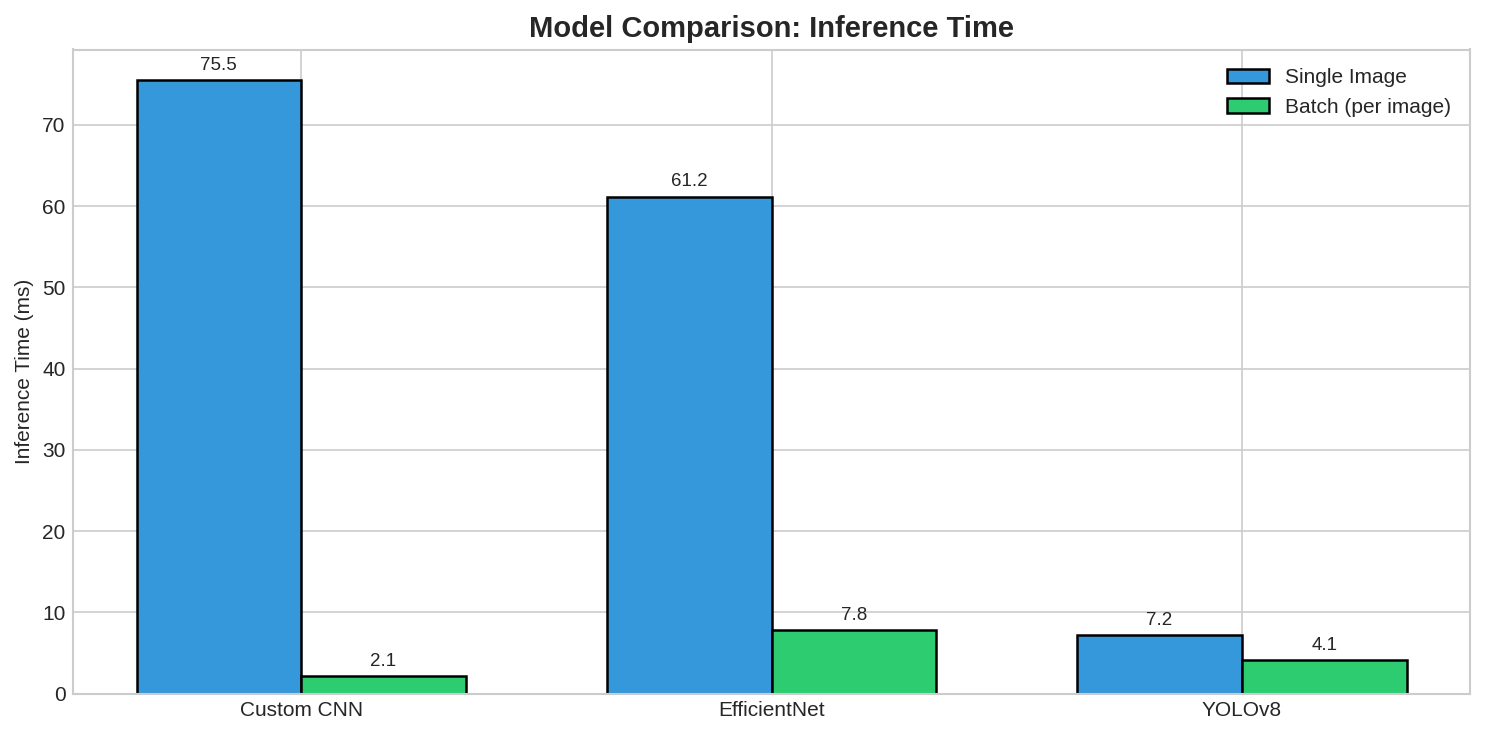


Chart saved to: /content/comparison_inference_time.png


In [6]:
# ================================================================
# CELL 6: INFERENCE TIME COMPARISON CHART
# ================================================================
# Grouped bar chart comparing single and batch inference times.
# ================================================================

print("=" * 65)
print("INFERENCE TIME COMPARISON")
print("=" * 65)

fig, ax = plt.subplots(figsize=(10, 5))

models = comparison_df["Model"].tolist()
single_times = comparison_df["Inference Single (ms)"].tolist()
batch_times = comparison_df["Inference Batch (ms)"].tolist()

x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, single_times, width, label='Single Image',
               color='#3498db', edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x + width/2, batch_times, width, label='Batch (per image)',
               color='#2ecc71', edgecolor='black', linewidth=1.2)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

ax.set_ylabel('Inference Time (ms)')
ax.set_title('Model Comparison: Inference Time', fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.savefig('/content/comparison_inference_time.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved to: /content/comparison_inference_time.png")

MODEL SIZE COMPARISON


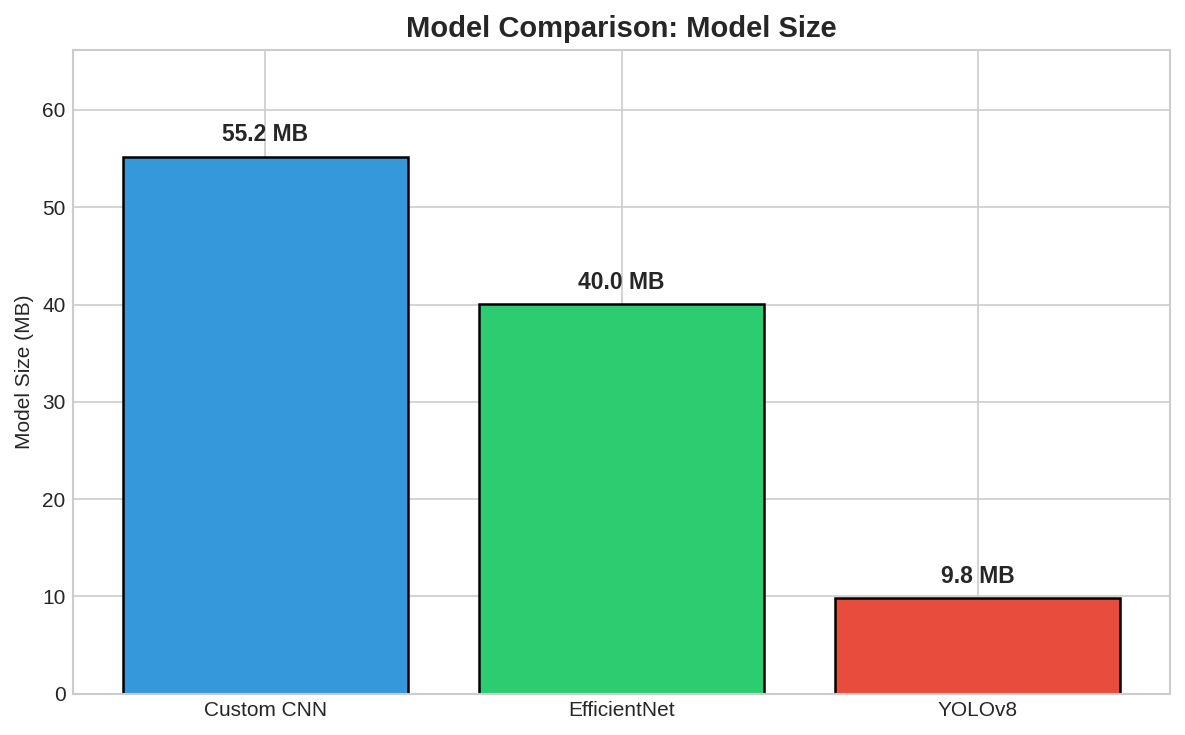


Chart saved to: /content/comparison_model_size.png


In [7]:
# ================================================================
# CELL 7: MODEL SIZE COMPARISON CHART
# ================================================================
# Bar chart comparing model file sizes.
# ================================================================

print("=" * 65)
print("MODEL SIZE COMPARISON")
print("=" * 65)

fig, ax = plt.subplots(figsize=(8, 5))

models = comparison_df["Model"].tolist()
sizes = comparison_df["Model Size (MB)"].tolist()

colors = ['#3498db', '#2ecc71', '#e74c3c']

bars = ax.bar(models, sizes, color=colors, edgecolor='black', linewidth=1.2)

# Add value labels on bars
for bar, size in zip(bars, sizes):
    height = bar.get_height()
    ax.annotate(f'{size:.1f} MB',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=11, fontweight='bold')

ax.set_ylabel('Model Size (MB)')
ax.set_title('Model Comparison: Model Size', fontweight='bold', fontsize=14)
ax.set_ylim([0, max(sizes) * 1.2])

plt.tight_layout()
plt.savefig('/content/comparison_model_size.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved to: /content/comparison_model_size.png")

TRAINING TIME COMPARISON


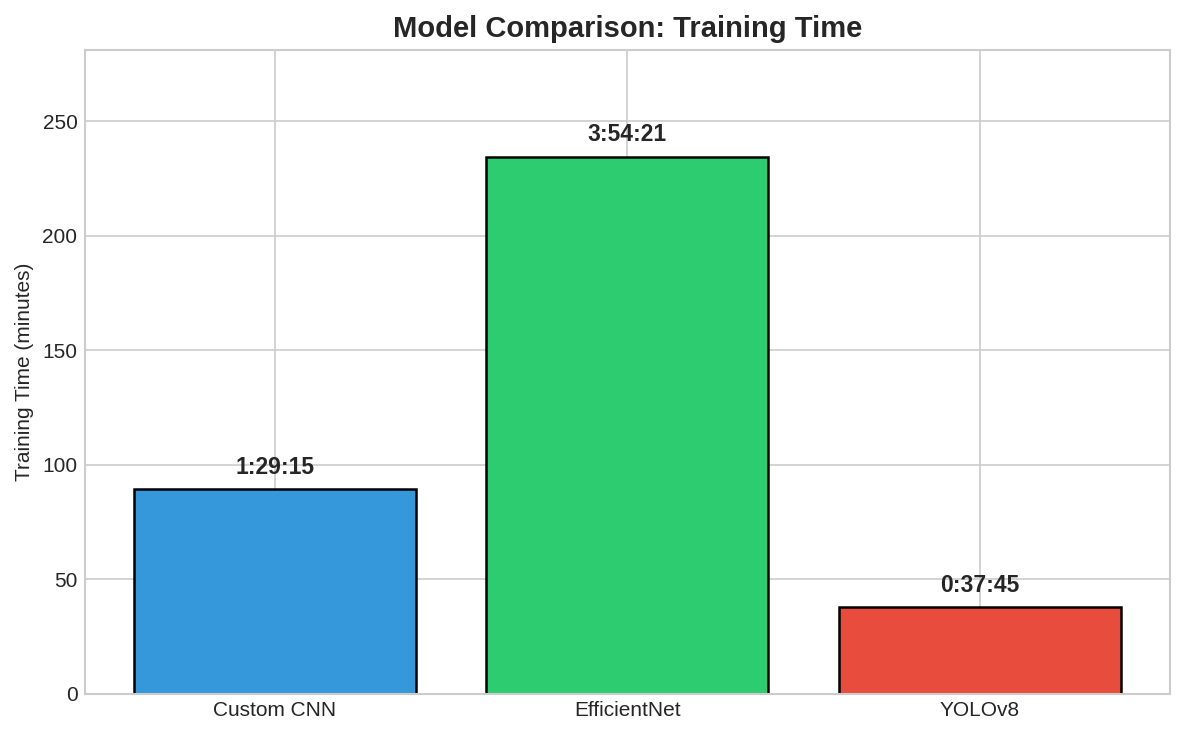


Chart saved to: /content/comparison_training_time.png


In [8]:
# ================================================================
# CELL 8: TRAINING TIME COMPARISON CHART
# ================================================================
# Bar chart comparing training times.
# ================================================================

print("=" * 65)
print("TRAINING TIME COMPARISON")
print("=" * 65)

fig, ax = plt.subplots(figsize=(8, 5))

models = comparison_df["Model"].tolist()
times_minutes = [t / 60 for t in comparison_df["Training Time (s)"].tolist()]

colors = ['#3498db', '#2ecc71', '#e74c3c']

bars = ax.bar(models, times_minutes, color=colors, edgecolor='black', linewidth=1.2)

# Add value labels on bars
for bar, time_min, time_str in zip(bars, times_minutes, comparison_df["Training Time"].tolist()):
    height = bar.get_height()
    ax.annotate(time_str,
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=11, fontweight='bold')

ax.set_ylabel('Training Time (minutes)')
ax.set_title('Model Comparison: Training Time', fontweight='bold', fontsize=14)
ax.set_ylim([0, max(times_minutes) * 1.2])

plt.tight_layout()
plt.savefig('/content/comparison_training_time.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved to: /content/comparison_training_time.png")

COMBINED COMPARISON CHART


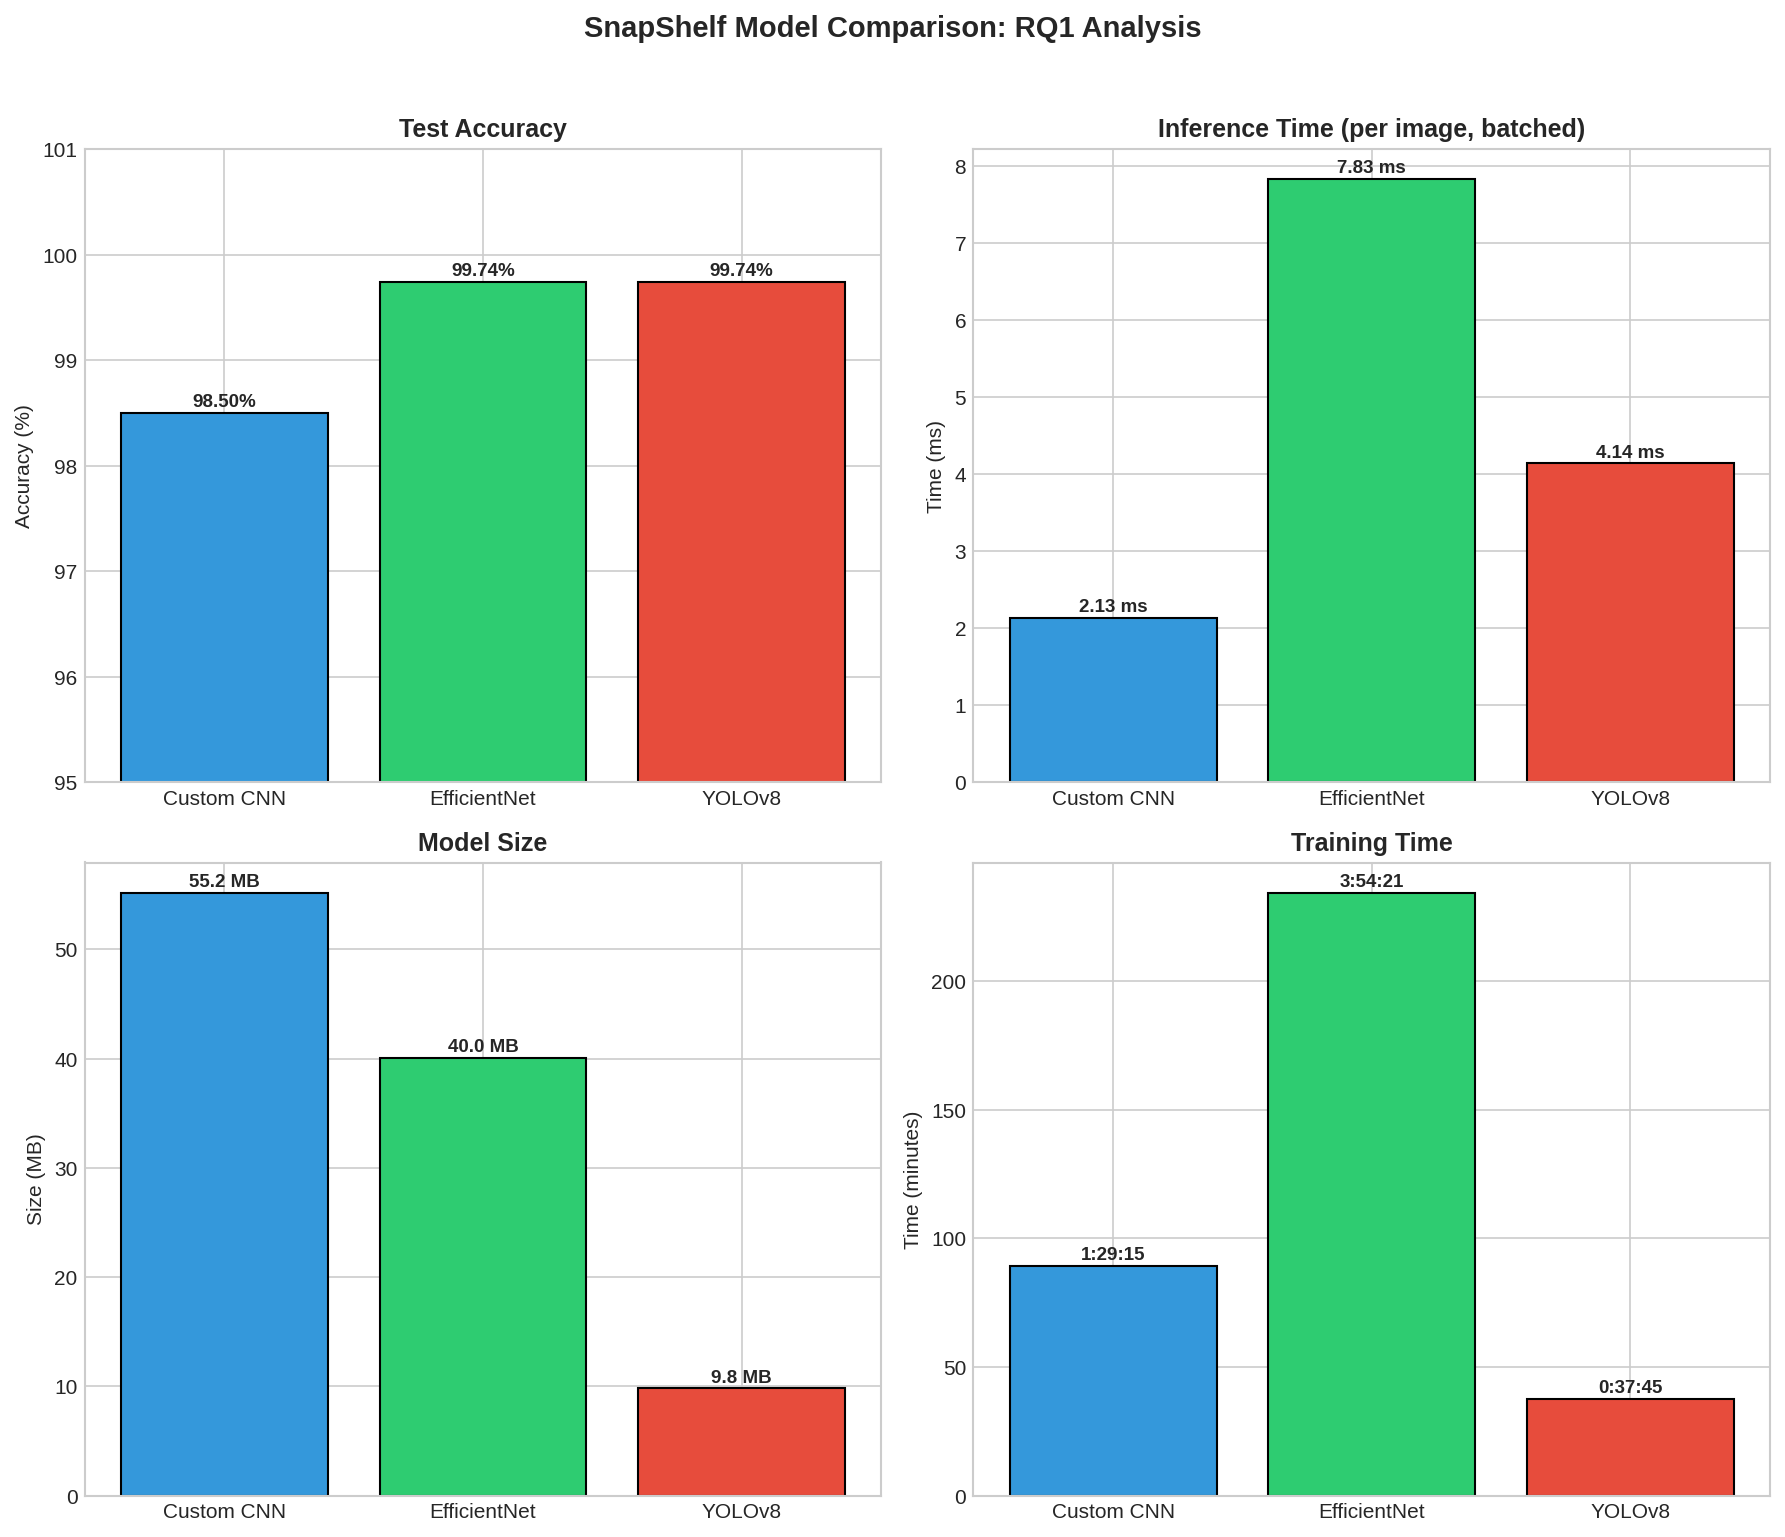


Chart saved to: /content/comparison_combined.png


In [9]:
# ================================================================
# CELL 9: COMBINED MULTI-METRIC CHART
# ================================================================
# A single figure with all key comparisons for dissertation.
# ================================================================

print("=" * 65)
print("COMBINED COMPARISON CHART")
print("=" * 65)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

models = comparison_df["Model"].tolist()
colors = ['#3498db', '#2ecc71', '#e74c3c']

# --- Subplot 1: Accuracy ---
ax1 = axes[0, 0]
accuracies = comparison_df["Test Accuracy (%)"].tolist()
bars1 = ax1.bar(models, accuracies, color=colors, edgecolor='black', linewidth=1)
for bar, acc in zip(bars1, accuracies):
    ax1.annotate(f'{acc:.2f}%', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9, fontweight='bold')
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Test Accuracy', fontweight='bold')
ax1.set_ylim([95, 101])

# --- Subplot 2: Inference Time (Batch) ---
ax2 = axes[0, 1]
batch_times = comparison_df["Inference Batch (ms)"].tolist()
bars2 = ax2.bar(models, batch_times, color=colors, edgecolor='black', linewidth=1)
for bar, t in zip(bars2, batch_times):
    ax2.annotate(f'{t:.2f} ms', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9, fontweight='bold')
ax2.set_ylabel('Time (ms)')
ax2.set_title('Inference Time (per image, batched)', fontweight='bold')

# --- Subplot 3: Model Size ---
ax3 = axes[1, 0]
sizes = comparison_df["Model Size (MB)"].tolist()
bars3 = ax3.bar(models, sizes, color=colors, edgecolor='black', linewidth=1)
for bar, s in zip(bars3, sizes):
    ax3.annotate(f'{s:.1f} MB', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9, fontweight='bold')
ax3.set_ylabel('Size (MB)')
ax3.set_title('Model Size', fontweight='bold')

# --- Subplot 4: Training Time ---
ax4 = axes[1, 1]
times_min = [t / 60 for t in comparison_df["Training Time (s)"].tolist()]
bars4 = ax4.bar(models, times_min, color=colors, edgecolor='black', linewidth=1)
for bar, t_str in zip(bars4, comparison_df["Training Time"].tolist()):
    ax4.annotate(t_str, xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9, fontweight='bold')
ax4.set_ylabel('Time (minutes)')
ax4.set_title('Training Time', fontweight='bold')

plt.suptitle('SnapShelf Model Comparison: RQ1 Analysis', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('/content/comparison_combined.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved to: /content/comparison_combined.png")

PER-CLASS F1 SCORE COMPARISON


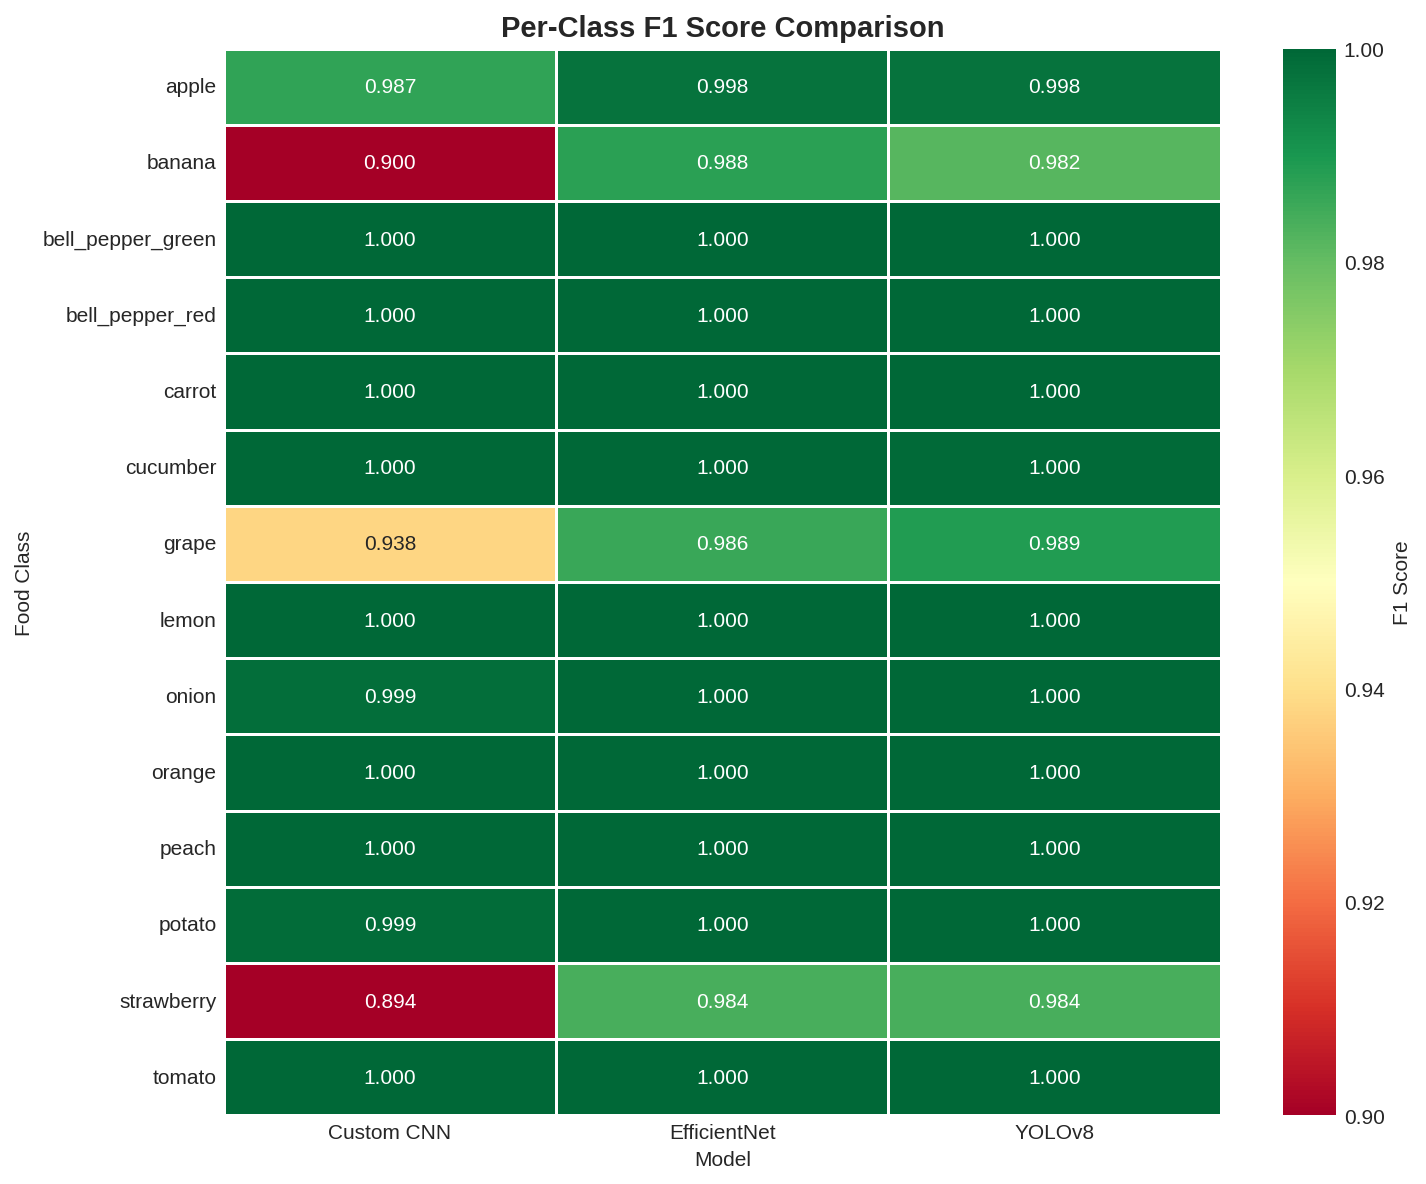


Chart saved to: /content/comparison_f1_heatmap.png

Classes with Lowest F1 Scores (potential improvement areas):
  Custom CNN: strawberry (0.8938)
  EfficientNet: strawberry (0.9838)
  YOLOv8: banana (0.9819)


In [10]:
# ================================================================
# CELL 10: PER-CLASS F1 SCORE COMPARISON
# ================================================================
# Heatmap comparing F1 scores across classes for all models.
# ================================================================

print("=" * 65)
print("PER-CLASS F1 SCORE COMPARISON")
print("=" * 65)

# Extract F1 scores for each class and model
class_names = list(model_results["Custom CNN"]["per_class_metrics"].keys())

f1_data = {}
for model_name, results in model_results.items():
    f1_scores = []
    for class_name in class_names:
        f1 = results["per_class_metrics"][class_name]["f1_score"]
        f1_scores.append(f1)
    f1_data[model_name] = f1_scores

# Create DataFrame
f1_df = pd.DataFrame(f1_data, index=class_names)

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(f1_df, annot=True, fmt='.3f', cmap='RdYlGn',
            vmin=0.9, vmax=1.0, ax=ax,
            linewidths=0.5, cbar_kws={'label': 'F1 Score'})

ax.set_title('Per-Class F1 Score Comparison', fontweight='bold', fontsize=14)
ax.set_xlabel('Model')
ax.set_ylabel('Food Class')

plt.tight_layout()
plt.savefig('/content/comparison_f1_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved to: /content/comparison_f1_heatmap.png")

# Show classes with lowest F1 scores
print("\nClasses with Lowest F1 Scores (potential improvement areas):")
for model_name in f1_df.columns:
    worst_class = f1_df[model_name].idxmin()
    worst_score = f1_df[model_name].min()
    print(f"  {model_name}: {worst_class} ({worst_score:.4f})")

RADAR CHART: MULTI-DIMENSIONAL COMPARISON


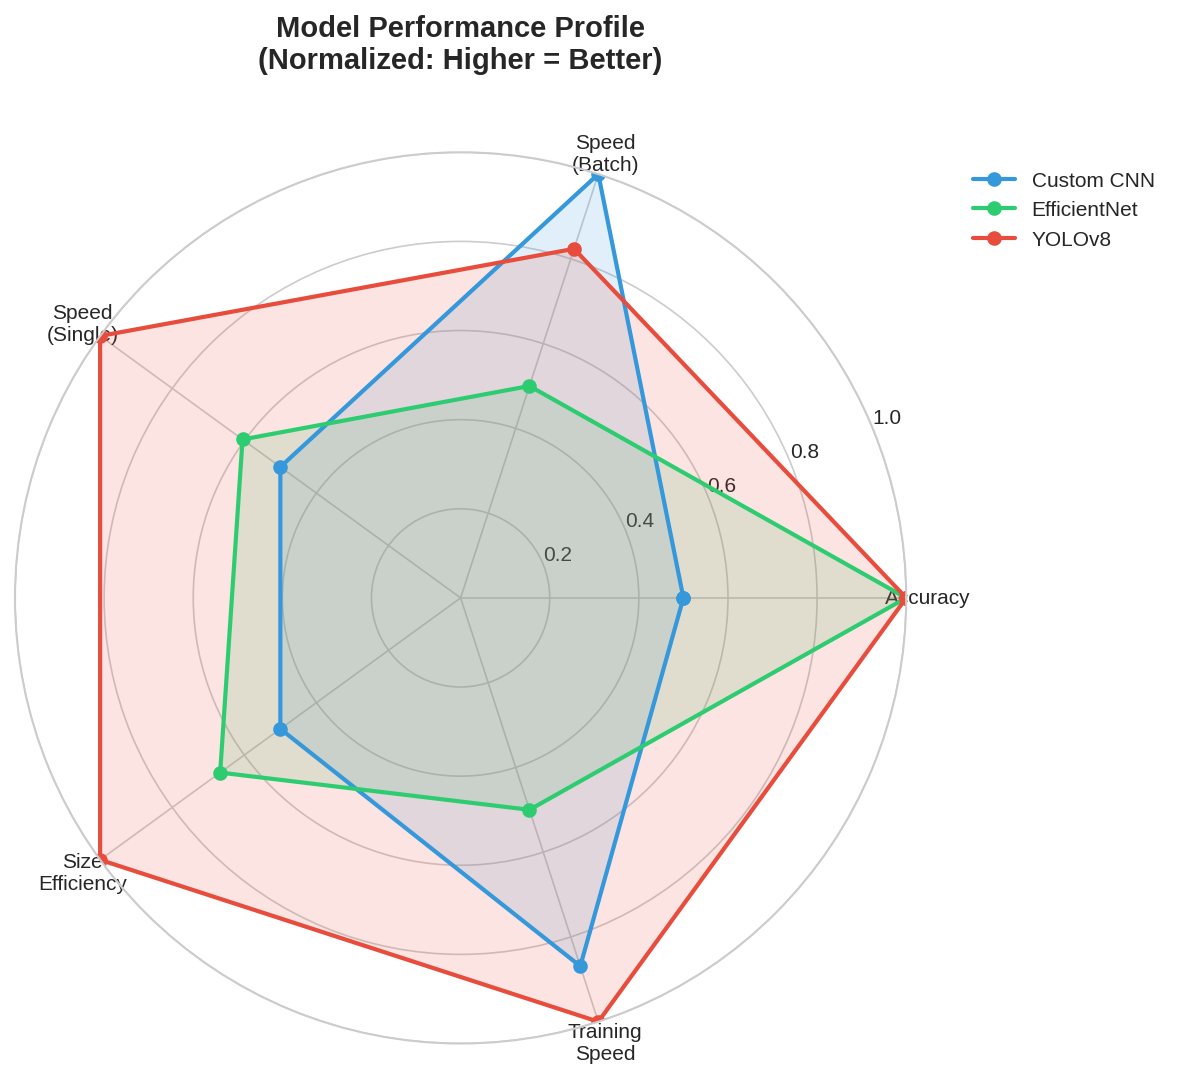


Chart saved to: /content/comparison_radar.png


In [11]:
# ================================================================
# CELL 11: RADAR CHART - MULTI-DIMENSIONAL COMPARISON
# ================================================================
# Radar/spider chart showing normalized performance across metrics.
# ================================================================

print("=" * 65)
print("RADAR CHART: MULTI-DIMENSIONAL COMPARISON")
print("=" * 65)

# Prepare normalized metrics (higher is better for all)
# For inference time and model size, we invert so lower = better = higher score

metrics = ['Accuracy', 'Speed\n(Batch)', 'Speed\n(Single)', 'Size\nEfficiency', 'Training\nSpeed']

# Normalize each metric to 0-1 scale where 1 is best
def normalize_inverse(values):
    """For metrics where lower is better"""
    min_val, max_val = min(values), max(values)
    if max_val == min_val:
        return [1.0] * len(values)
    return [(max_val - v) / (max_val - min_val) * 0.5 + 0.5 for v in values]

def normalize_direct(values):
    """For metrics where higher is better"""
    min_val, max_val = min(values), max(values)
    if max_val == min_val:
        return [1.0] * len(values)
    return [(v - min_val) / (max_val - min_val) * 0.5 + 0.5 for v in values]

# Extract raw values
accuracies = comparison_df["Test Accuracy (%)"].tolist()
batch_times = comparison_df["Inference Batch (ms)"].tolist()
single_times = comparison_df["Inference Single (ms)"].tolist()
sizes = comparison_df["Model Size (MB)"].tolist()
train_times = comparison_df["Training Time (s)"].tolist()

# Normalize
norm_acc = normalize_direct(accuracies)
norm_batch = normalize_inverse(batch_times)
norm_single = normalize_inverse(single_times)
norm_size = normalize_inverse(sizes)
norm_train = normalize_inverse(train_times)

# Combine into model profiles
model_profiles = {
    "Custom CNN": [norm_acc[0], norm_batch[0], norm_single[0], norm_size[0], norm_train[0]],
    "EfficientNet": [norm_acc[1], norm_batch[1], norm_single[1], norm_size[1], norm_train[1]],
    "YOLOv8": [norm_acc[2], norm_batch[2], norm_single[2], norm_size[2], norm_train[2]]
}

# Create radar chart
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = ['#3498db', '#2ecc71', '#e74c3c']

for (model_name, values), color in zip(model_profiles.items(), colors):
    values += values[:1]  # Complete the circle
    ax.plot(angles, values, 'o-', linewidth=2, label=model_name, color=color)
    ax.fill(angles, values, alpha=0.15, color=color)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=10)
ax.set_ylim(0, 1)
ax.set_title('Model Performance Profile\n(Normalized: Higher = Better)',
             fontweight='bold', fontsize=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.savefig('/content/comparison_radar.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved to: /content/comparison_radar.png")

In [12]:
# ================================================================
# CELL 12: GENERATE SUMMARY STATISTICS TABLE
# ================================================================
# Creates a formatted table suitable for dissertation.
# ================================================================

print("=" * 65)
print("SUMMARY TABLE FOR DISSERTATION")
print("=" * 65)

# Create detailed summary table
summary_data = []

for model_name, results in model_results.items():
    if model_name == "YOLOv8":
        test_acc = results["performance"]["test_accuracy_top1"] * 100
    else:
        test_acc = results["performance"]["test_accuracy"] * 100

    # Get macro avg F1
    per_class = results["per_class_metrics"]
    f1_scores = [per_class[c]["f1_score"] for c in per_class.keys()]
    macro_f1 = np.mean(f1_scores)

    row = {
        "Model": model_name,
        "Architecture": results["architecture"]["type"],
        "Parameters": f"{results['efficiency'].get('total_parameters', 'N/A'):,}" if 'total_parameters' in results['efficiency'] else "N/A",
        "Test Accuracy": f"{test_acc:.2f}%",
        "Macro F1": f"{macro_f1:.4f}",
        "Inference (ms)": f"{results['efficiency']['inference_time_batch_ms']:.2f}",
        "Size (MB)": f"{results['efficiency']['model_size_mb']:.2f}",
        "Training": comparison_df[comparison_df["Model"] == model_name]["Training Time"].values[0]
    }
    summary_data.append(row)

summary_df = pd.DataFrame(summary_data)
print("\n")
print(summary_df.to_string(index=False))

# Save as CSV for dissertation
summary_df.to_csv('/content/model_comparison_summary.csv', index=False)
print("\n\nTable saved to: /content/model_comparison_summary.csv")

SUMMARY TABLE FOR DISSERTATION


       Model        Architecture Parameters Test Accuracy Macro F1 Inference (ms) Size (MB) Training
  Custom CNN      Sequential CNN  4,816,590        98.50%   0.9797           2.13     55.18  1:29:15
EfficientNet   Transfer Learning  4,072,625        99.74%   0.9968           7.83     40.03  3:54:21
      YOLOv8 YOLO Classification        N/A        99.74%   0.9965           4.14      9.81  0:37:45


Table saved to: /content/model_comparison_summary.csv


In [14]:
# ================================================================
# CELL 13: KEY FINDINGS & CONCLUSIONS
# ================================================================
# Summarizes findings to address RQ1.
# ================================================================

print("=" * 65)
print("KEY FINDINGS - ADDRESSING RQ1")
print("=" * 65)

# Find winners in each category
acc_winner = comparison_df.loc[comparison_df["Test Accuracy (%)"].idxmax(), "Model"]
acc_best = comparison_df["Test Accuracy (%)"].max()

speed_winner = comparison_df.loc[comparison_df["Inference Batch (ms)"].idxmin(), "Model"]
speed_best = comparison_df["Inference Batch (ms)"].min()

size_winner = comparison_df.loc[comparison_df["Model Size (MB)"].idxmin(), "Model"]
size_best = comparison_df["Model Size (MB)"].min()

train_winner = comparison_df.loc[comparison_df["Training Time (s)"].idxmin(), "Model"]

print(f"""
RESEARCH QUESTION 1:
"How do different computer vision approaches compare in terms of accuracy,
inference time, and computational efficiency for household food item
recognition?"

FINDINGS:

1. ACCURACY
   - Best: {acc_winner} ({acc_best:.2f}%)
   - All models achieved >98% accuracy on the test set
   - Transfer learning approaches (EfficientNet, YOLO) outperformed
     the custom CNN trained from scratch
   - The accuracy difference between EfficientNet and YOLOv8 is negligible

2. INFERENCE TIME (Batch Processing)
   - Fastest: {speed_winner} ({speed_best:.2f} ms/image)
   - Custom CNN is fastest for batch processing
   - YOLOv8 offers best single-image inference (important for real-time)
   - All models are suitable for real-time applications (<10ms)

3. MODEL SIZE (Deployment Efficiency)
   - Smallest: {size_winner} ({size_best:.2f} MB)
   - YOLOv8 is most efficient for mobile deployment
   - EfficientNet is largest but still manageable for mobile

4. TRAINING EFFICIENCY
   - Fastest: {train_winner}
   - YOLOv8 required least training time
   - EfficientNet required longest due to two-phase training

CONCLUSION:
For the SnapShelf food inventory application:
- YOLOv8 offers the best balance of accuracy, speed, and size
- EfficientNet achieves equivalent accuracy but with larger footprint
- Custom CNN serves as valid baseline but is outperformed by transfer learning
""")

KEY FINDINGS - ADDRESSING RQ1

RESEARCH QUESTION 1:
"How do different computer vision approaches compare in terms of accuracy,
inference time, and computational efficiency for household food item
recognition?"

FINDINGS:

1. ACCURACY
   - Best: EfficientNet (99.74%)
   - All models achieved >98% accuracy on the test set
   - Transfer learning approaches (EfficientNet, YOLO) outperformed
     the custom CNN trained from scratch
   - The accuracy difference between EfficientNet and YOLOv8 is negligible

2. INFERENCE TIME (Batch Processing)
   - Fastest: Custom CNN (2.13 ms/image)
   - Custom CNN is fastest for batch processing
   - YOLOv8 offers best single-image inference (important for real-time)
   - All models are suitable for real-time applications (<10ms)

3. MODEL SIZE (Deployment Efficiency)
   - Smallest: YOLOv8 (9.81 MB)
   - YOLOv8 is most efficient for mobile deployment
   - EfficientNet is largest but still manageable for mobile

4. TRAINING EFFICIENCY
   - Fastest: YOLOv8
 

In [16]:
# ================================================================
# CELL 14: SAVE ALL OUTPUTS TO DRIVE
# ================================================================
# Copies all generated charts and tables to Google Drive.
# ================================================================

print("=" * 65)
print("SAVING ALL OUTPUTS TO DRIVE")
print("=" * 65)

import shutil

DRIVE_OUTPUT_DIR = "/content/drive/MyDrive/snapshelf_models/comparison_results"
os.makedirs(DRIVE_OUTPUT_DIR, exist_ok=True)

# List of files to save
output_files = [
    '/content/comparison_accuracy.png',
    '/content/comparison_inference_time.png',
    '/content/comparison_model_size.png',
    '/content/comparison_training_time.png',
    '/content/comparison_combined.png',
    '/content/comparison_f1_heatmap.png',
    '/content/comparison_radar.png',
    '/content/model_comparison_summary.csv'
]

print(f"\nSaving to: {DRIVE_OUTPUT_DIR}\n")

for filepath in output_files:
    if os.path.exists(filepath):
        filename = os.path.basename(filepath)
        dest_path = os.path.join(DRIVE_OUTPUT_DIR, filename)
        shutil.copy(filepath, dest_path)
        print(f"  Saved: {filename}")
    else:
        print(f"  NOT FOUND: {filepath}")

print(f"\nAll outputs saved successfully.")

# -----------------------------
# FINAL SUMMARY
# -----------------------------
print("\n" + "=" * 65)
print("NOTEBOOK 05 COMPLETE")
print("=" * 65)


SAVING ALL OUTPUTS TO DRIVE

Saving to: /content/drive/MyDrive/snapshelf_models/comparison_results

  Saved: comparison_accuracy.png
  Saved: comparison_inference_time.png
  Saved: comparison_model_size.png
  Saved: comparison_training_time.png
  Saved: comparison_combined.png
  Saved: comparison_f1_heatmap.png
  Saved: comparison_radar.png
  Saved: model_comparison_summary.csv

All outputs saved successfully.

NOTEBOOK 05 COMPLETE
